<div class="alert alert-block alert-info">
    <h2><strong><center>Import Library</center><strong></h2>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

<div class="alert alert-block alert-info">
    <h2><strong><center>Input Data</center><strong></h2>

In [5]:
DP_safe_filename = "../result/DP/dp_safe_result.txt"
leader_filename_prefix = "../result/DataDrivenMPC/leader_result*"


In [6]:
dp_safe_df = pd.DataFrame(columns = ["space", "speed", "limit"])
for line in open(DP_safe_filename,"r"): #设置文件对象并读取每一行文件
    strs = line.split(" ")
    dp_safe_df = dp_safe_df.append({"space": float(strs[0]), "speed": float(strs[1]), "limit": float(strs[2])}, ignore_index = True)

In [7]:
glob.glob(leader_filename_prefix)

['../result/DataDrivenMPC/leader_result0.txt',
 '../result/DataDrivenMPC/leader_result1.txt']

In [8]:
df_list = []
for filename in glob.glob(leader_filename_prefix):
    temp_df = pd.DataFrame(columns = ["space", "speed", "function"])
    for line in open(filename,"r"): #设置文件对象并读取每一行文件
        strs = line.split(" ")
        temp_df = temp_df.append({"space": float(strs[0]), "speed": float(strs[1]), "function": float(strs[2])}, ignore_index = True)
    df_list.append(temp_df)

IndexError: list index out of range

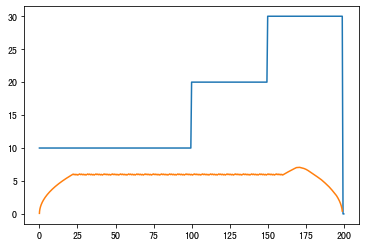

In [9]:
plt.plot(dp_safe_df["space"], dp_safe_df["limit"])
for i in [0, 9, 19, 29, 39]:
#for i in range(len(df_list)):
    df = df_list[i]
    plt.plot(df["space"], df["speed"])
#    plt.plot(df[(df["space"] < 170) & (df["space"] > 100)]["space"], df[(df["space"] < 170) & (df["space"] > 100)]["speed"])
plt.legend(["limit", "iter0", "iter9", "iter19", "iter29", "iter39"])
plt.xlabel("s")
plt.ylabel("v")
plt.title("data driven leader control")
plt.show()